## Basic Information

- Jupyter uses python from this location - `c:\Users\pawan\AppData\Local\Programs\Python\Python311\python.exe`
- to find the available paths of python in windows - `!where python`
- to install new libraries in jupyter

    ```python
    import sys
    print(sys.executable)
    !{sys.executable} -m pip install numpy, pandas, matplotlib, seaborn
    ```

In [1]:
# 1ST AND 2ND QUESTION
# DATA READING AND DATA LOADING

import csv
import numpy as np

def load_bmx_data(filepath):
    data = []
    with open(filepath, "r") as file:
        reader = csv.reader(file)
        header = next(reader)  # Skip header
        for i, row in enumerate(reader, start=2):
            try:
                float_row = [float(cell) for cell in row]
                data.append(float_row)
            except ValueError:
                print(f"Skipping row {i} in {filepath}: non-numeric data -> {row}")
    return np.array(data)

# Load male and female data
male = load_bmx_data("nhanes_adult_male_bmx_2020.csv")
female = load_bmx_data("nhanes_adult_female_bmx_2020.csv")

# Quick sanity check
print("Male shape:", male.shape)
print("Female shape:", female.shape)


Male shape: (4081, 7)
Female shape: (4221, 7)


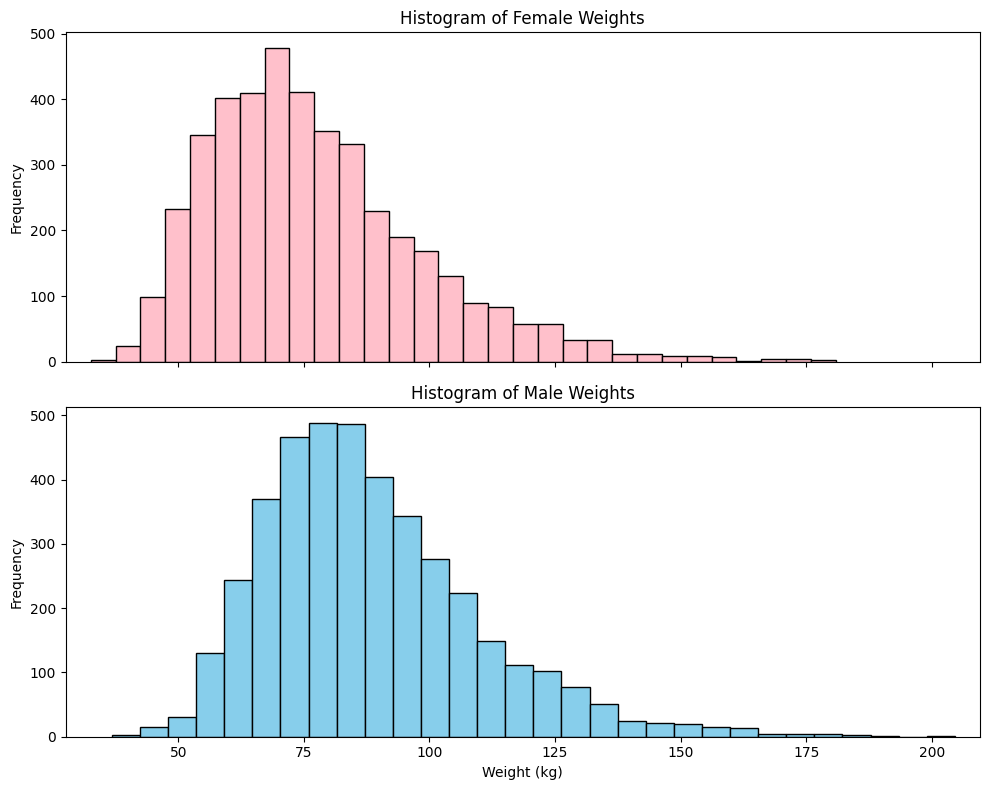

In [2]:
# 3RD QUESTION

import matplotlib.pyplot as plt

# Extract weights (column 0) from both datasets
female_weights = female[:, 0]
male_weights = male[:, 0]

# Determine x-axis range (same for both plots)
xmin = min(female_weights.min(), male_weights.min())
xmax = max(female_weights.max(), male_weights.max())

# Create subplots: 2 rows, 1 column
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Top: Female weights
axs[0].hist(female_weights, bins=30, color='pink', edgecolor='black')
axs[0].set_title("Histogram of Female Weights")
axs[0].set_ylabel("Frequency")

# Bottom: Male weights
axs[1].hist(male_weights, bins=30, color='skyblue', edgecolor='black')
axs[1].set_title("Histogram of Male Weights")
axs[1].set_xlabel("Weight (kg)")
axs[1].set_ylabel("Frequency")

# Set same x-axis range for both
plt.xlim(xmin - 5, xmax + 5)

# Adjust layout for readability
plt.tight_layout()
plt.show()


C:\Users\pawan\AppData\Local\Temp\ipykernel_16404\453180885.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights, male_weights],


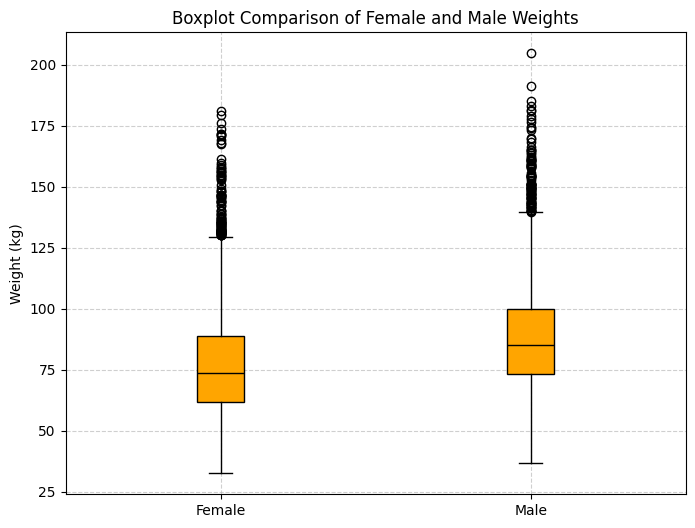

In [ ]:
# 4TH NO QUESTION


import matplotlib.pyplot as plt

# Create a boxplot comparing female and male weights
plt.figure(figsize=(8, 6))
plt.boxplot([female_weights, male_weights],
            labels=['Female', 'Male'],
            patch_artist=True,
            boxprops=dict(facecolor='orange'),
            medianprops=dict(color='black'))

# Add title and axis labels
plt.title("Boxplot Comparison of Female and Male Weights")
plt.ylabel("Weight (kg)")

# Show the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
# 5TH NO QUESTION


import numpy as np

# Function to calculate skewness manually
def calculate_skewness(data):
    mean = np.mean(data)
    std = np.std(data)
    n = len(data)
    skewness = (np.sum((data - mean) ** 3) / n) / (std ** 3)
    return skewness

# Female stats
female_mean = np.mean(female_weights)
female_median = np.median(female_weights)
female_std = np.std(female_weights)
female_var = np.var(female_weights)
female_min = np.min(female_weights)
female_max = np.max(female_weights)
female_skew = calculate_skewness(female_weights)

# Male stats
male_mean = np.mean(male_weights)
male_median = np.median(male_weights)
male_std = np.std(male_weights)
male_var = np.var(male_weights)
male_min = np.min(male_weights)
male_max = np.max(male_weights)
male_skew = calculate_skewness(male_weights)

# Display results
print("Female Weight Stats:")
print(f"Mean: {female_mean:.2f}, Median: {female_median:.2f}")
print(f"Standard Deviation: {female_std:.2f}, Variance: {female_var:.2f}")
print(f"Min: {female_min:.2f}, Max: {female_max:.2f}")
print(f"Skewness: {female_skew:.2f}\n")

print("Male Weight Stats:")
print(f"Mean: {male_mean:.2f}, Median: {male_median:.2f}")
print(f"Standard Deviation: {male_std:.2f}, Variance: {male_var:.2f}")
print(f"Min: {male_min:.2f}, Max: {male_max:.2f}")
print(f"Skewness: {male_skew:.2f}")


Female Weight Stats:
Mean: 77.40, Median: 73.60
Standard Deviation: 21.54, Variance: 464.08
Min: 32.60, Max: 180.90
Skewness: 1.03

Male Weight Stats:
Mean: 88.36, Median: 85.00
Standard Deviation: 21.42, Variance: 458.77
Min: 36.80, Max: 204.60
Skewness: 0.98


In [ ]:
# 6TH NO QUESTION


# Assuming height is in centimeters
height_m = female[:, 1] / 100  # Convert to meters if needed
weight_kg = female[:, 0]

# Calculate BMI
female_bmi = weight_kg / (height_m ** 2)

# Add BMI as the 8th column (index 7)
female_with_bmi = np.hstack((female, female_bmi.reshape(-1, 1)))

# Print shape to confirm it worked
print("Original shape:", female.shape)
print("New shape with BMI:", female_with_bmi.shape)

# Optional: peek at first few rows
print(female_with_bmi[:5])


Original shape: (4221, 7)
New shape with BMI: (4221, 8)
[[ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2         23.17879132]]


In [ ]:
# 7TH NO QUESTION


# Compute the mean and std of each column
female_mean = np.mean(female, axis=0)
female_std = np.std(female, axis=0)

# Compute the z-scores (standardization)
zfemale = (female - female_mean) / female_std

# Print to check
print("Shape of zfemale:", zfemale.shape)
print(zfemale[:5])  # preview first 5 rows


Shape of zfemale: (4221, 7)
[[ 0.91429508  0.00895038 -0.56739463  1.13298804  0.55084546  1.08316157
   1.11578462]
 [ 0.63577599 -1.05306843 -1.07893145 -1.29349161  1.03221804  1.04475528
   0.265089  ]
 [-0.2044233   0.15055289  0.5835632   0.26194406 -0.1622991  -0.19064688
  -0.37293272]
 [-0.7289676  -0.38753664  0.83933161 -0.76464348 -0.66150029 -0.52350135
  -0.45915188]
 [-1.02141265 -0.78402366 -0.6100227  -0.98240447 -0.78630059 -1.06759039
  -1.45354609]]


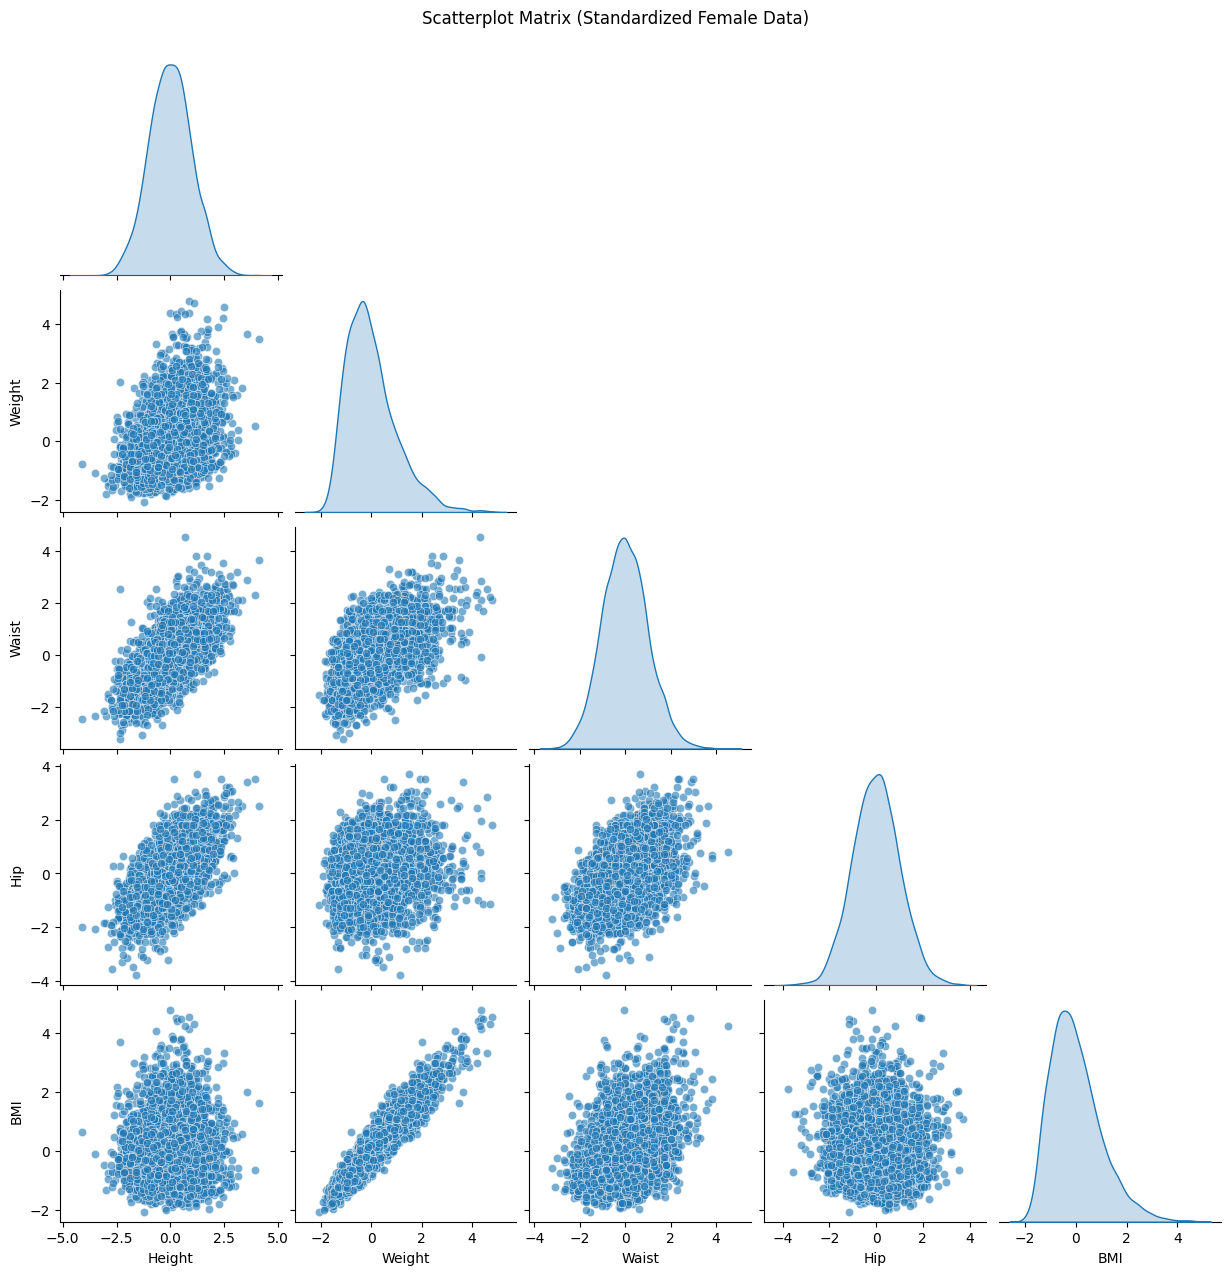

📌 Pearson Correlation Matrix:
         Height  Weight  Waist   Hip   BMI
Height    1.00    0.35   0.67  0.66  0.03
Weight    0.35    1.00   0.55  0.19  0.95
Waist     0.67    0.55   1.00  0.48  0.36
Hip       0.66    0.19   0.48  1.00 -0.01
BMI       0.03    0.95   0.36 -0.01  1.00 

📌 Spearman Correlation Matrix:
         Height  Weight  Waist   Hip   BMI
Height    1.00    0.34   0.67  0.65  0.02
Weight    0.34    1.00   0.54  0.20  0.94
Waist     0.67    0.54   1.00  0.46  0.34
Hip       0.65    0.20   0.46  1.00 -0.02
BMI       0.02    0.94   0.34 -0.02  1.00


In [ ]:
# 8TH NO QUESTION

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 1: Calculate BMI and add it to the female matrix
height_m = female[:, 1] / 100  # Convert height to meters if it's in cm
weight_kg = female[:, 0]
bmi = weight_kg / (height_m ** 2)

# Add BMI as the 8th column
female_with_bmi = np.hstack((female, bmi.reshape(-1, 1)))

# STEP 2: Standardize the new matrix with BMI
female_mean = np.mean(female_with_bmi, axis=0)
female_std = np.std(female_with_bmi, axis=0)
zfemale = (female_with_bmi - female_mean) / female_std

# STEP 3: Extract selected standardized columns: Height, Weight, Waist, Hip, BMI
selected_cols = [1, 0, 2, 3, 7]  # height, weight, waist, hip, bmi
zfemale_subset = zfemale[:, selected_cols]

# STEP 4: Create labeled DataFrame
columns = ['Height', 'Weight', 'Waist', 'Hip', 'BMI']
df_zfemale = pd.DataFrame(zfemale_subset, columns=columns)

# STEP 5: Plot scatterplot matrix (pairplot)
sns.pairplot(df_zfemale, corner=True, diag_kind='kde', plot_kws={"alpha": 0.6})
plt.suptitle("Scatterplot Matrix (Standardized Female Data)", y=1.02)
plt.show()

# STEP 6: Compute Pearson and Spearman correlations
pearson_corr = df_zfemale.corr(method='pearson')
spearman_corr = df_zfemale.corr(method='spearman')

# Print results
print("📌 Pearson Correlation Matrix:\n", pearson_corr.round(2), "\n")
print("📌 Spearman Correlation Matrix:\n", spearman_corr.round(2))


In [ ]:
# 9TH NO QUESTION



# For the female dataset:
# Extract waist, height, and hip columns (assuming they're in index 2, 1, and 3)
female_waist = female[:, 2]
female_height = female[:, 1]
female_hip = female[:, 3]

# Calculate the waist-to-height ratio and waist-to-hip ratio for females
female_waist_to_height = female_waist / female_height
female_waist_to_hip = female_waist / female_hip

# Add the new columns to the female dataset
female_with_ratios = np.hstack((female, female_waist_to_height.reshape(-1, 1), female_waist_to_hip.reshape(-1, 1)))

# For the male dataset:
# Extract waist, height, and hip columns (assuming they're in index 2, 1, and 3)
male_waist = male[:, 2]
male_height = male[:, 1]
male_hip = male[:, 3]

# Calculate the waist-to-height ratio and waist-to-hip ratio for males
male_waist_to_height = male_waist / male_height
male_waist_to_hip = male_waist / male_hip

# Add the new columns to the male dataset
male_with_ratios = np.hstack((male, male_waist_to_height.reshape(-1, 1), male_waist_to_hip.reshape(-1, 1)))

# Optionally print out the first few rows to verify
print("Female dataset with new ratios (first 5 rows):")
print(female_with_ratios[:5])

print("\nMale dataset with new ratios (first 5 rows):")
print(male_with_ratios[:5])


Female dataset with new ratios (first 5 rows):
[[ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9          0.21660424   0.8504902 ]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1          0.21938441   1.01515152]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.           0.23200993   0.98421053]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5          0.24142313   1.09510086]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2          0.22380336   1.01764706]]

Male dataset with new ratios (first 5 rows):
[[ 98.8        182.3         42.          40.1         38.2
  108.2        120.4          0.23038947   1.04738155]
 [ 74.3        184.2         41.1         41.          30.2
   94.5         86.8          0.22312704   1.00243902]
 [103.7        185.3         47.          44.          32.
  107.8        109.6          0.25364274   

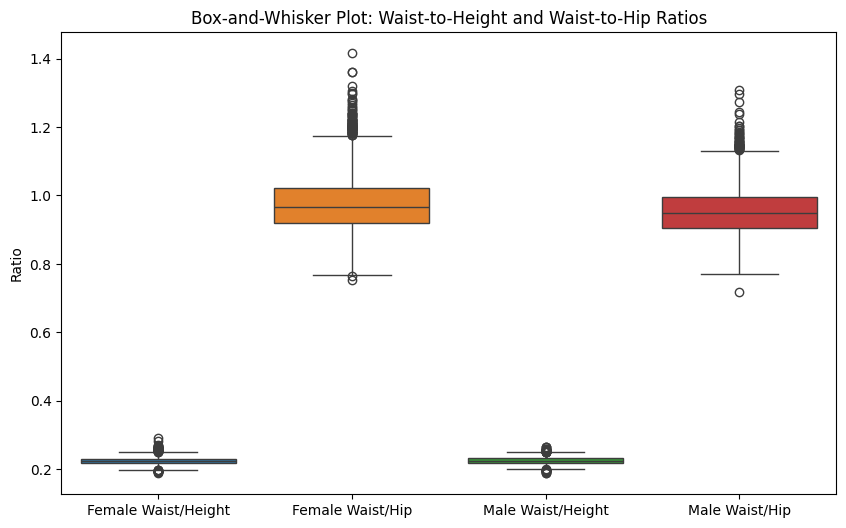

In [ ]:
# 10TH NO QUESTION


import matplotlib.pyplot as plt
import seaborn as sns

# Extract the waist-to-height and waist-to-hip ratios for both female and male datasets
female_waist_to_height = female_with_ratios[:, -2]  # The second-to-last column in the female dataset
female_waist_to_hip = female_with_ratios[:, -1]    # The last column in the female dataset
male_waist_to_height = male_with_ratios[:, -2]      # The second-to-last column in the male dataset
male_waist_to_hip = male_with_ratios[:, -1]         # The last column in the male dataset

# Combine these data points into a list for easy plotting
data = [female_waist_to_height, female_waist_to_hip, male_waist_to_height, male_waist_to_hip]

# Labels for the boxes (male and female for both waist-to-height and waist-to-hip)
labels = ['Female Waist/Height', 'Female Waist/Hip', 'Male Waist/Height', 'Male Waist/Hip']

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)

# Set plot labels
plt.title("Box-and-Whisker Plot: Waist-to-Height and Waist-to-Hip Ratios")
plt.ylabel("Ratio")
plt.xticks(ticks=range(4), labels=labels)

# Show the plot
plt.show()


# 11TH NO QUESTION

ADVANTAGES AND DISADVANTAGES:-

1. Body Mass Index (BMI)

Advantages:-

> Simple and Easy to Calculate: BMI only requires weight and height, making it quick and simple to measure.

> Widely Used: BMI is commonly used in health assessments and has been linked to disease risks such as heart disease, diabetes, and obesity.

> Population-level Indicator: BMI is helpful at the population level to track trends in weight status across groups, as it applies broadly to    both men and women.

Disadvantages:-

> Doesn’t Account for Body Composition: BMI doesn't differentiate between muscle mass and fat mass, so athletes with high muscle mass may have a high BMI, even if they are not overweight or obese.

> Doesn't Consider Fat Distribution: It doesn’t tell you where fat is distributed in the body (e.g., abdominal vs. hip fat), which is important for understanding health risks (e.g., visceral fat vs. subcutaneous fat).

> Not Suitable for All Populations: BMI may not be accurate for certain groups like the elderly, children, or people with different ethnic    backgrounds, as body composition and fat distribution can vary.



2. Waist-to-Height Ratio (WHtR)

Advantages:-

> Better Indicator of Health Risks: Waist-to-height ratio is often considered a better indicator of abdominal fat and, consequently, cardiovascular disease risk compared to BMI.

> More Accurate for Different Body Types: Unlike BMI, waist-to-height ratio is less likely to misclassify people with high muscle mass as overweight or obese.

> Simple and Easy to Calculate: Like BMI, it only requires waist circumference and height, both of which are easy to measure.

Disadvantages:-

> Still Doesn’t Account for Body Fat Composition: While better than BMI, WHtR still doesn’t account for fat mass vs. lean mass — both of which are important for overall health.

> Not Always Practical for Monitoring Weight Changes: Since it requires waist circumference measurement, some people may find it difficult to track regularly, especially without the right tools.

> Age and Sex Variability: WHtR can be influenced by age and sex, so interpretation may require adjustment for these factors.



4. Waist-to-Hip Ratio (WHR)

Advantages:-

> Better Indicator of Visceral Fat: WHR is a strong indicator of visceral fat (fat stored around internal organs), which is associated with higher health risks such as diabetes, heart disease, and metabolic syndrome.

> Useful for Understanding Fat Distribution: WHR can provide insights into whether an individual has an apple-shaped or pear-shaped body.

> Strong Correlation with Disease Risk: It has a well-established link to cardiovascular risk and other obesity-related diseases.

Disadvantages:-

> Doesn’t Account for Overall Body Fat: WHR only considers the waist and hip, so it misses broader measures of body fat, which could lead to inaccurate conclusions.

> Measurement Errors: Accurate measurement of waist and hip circumference can be difficult, and errors in technique can affect the ratio.

> Gender Differences: Although WHR is often used for both males and females, the interpretation may differ due to biological differences in fat distribution. Males tend to store fat around the abdomen (apple shape), while females typically store fat in the hips and thighs.



In [ ]:
#12TH NO QUESTION


import numpy as np

# Reminder: zfemale is the standardized version of female_with_bmi
# BMI is at index 7 in both female_with_bmi and zfemale

# Step 1: Get the index that would sort BMI values
sorted_indices = np.argsort(female_with_bmi[:, 7])  # Sort by original (non-standardized) BMI

# Step 2: Get the indices of the 5 lowest and 5 highest BMI values
lowest_bmi_indices = sorted_indices[:5]
highest_bmi_indices = sorted_indices[-5:]

# Step 3: Combine indices
selected_indices = np.concatenate((lowest_bmi_indices, highest_bmi_indices))

# Step 4: Extract corresponding rows from zfemale
zfemale_extremes = zfemale[selected_indices]

# Step 5: Print results
print("📌 Standardized measurements for 5 lowest and 5 highest BMI (rows from zfemale):\n")
print(zfemale_extremes)


📌 Standardized measurements for 5 lowest and 5 highest BMI (rows from zfemale):

[[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]
 [ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343  4.54270932]
 [ 4.36328993